In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

from subprocess import check_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def readandSplit(filename):
  with open(filename) as f:
        data = f.read().split('\n')
  tweets = []
  label = []   
  tweet = ""


  for d in data:
      if(len(d)==0):
          continue
      elif(len(d.split())==3):
          label.append(d.split()[2])
          if(tweet):
              tweets.append(tweet)
              tweet = ""
      elif(len(d.split())==2):
              tweet += d.split()[0]+' ' 

  tweets.append(tweet)

  return label,tweets

In [4]:
def readInList(filename):
  with open(filename) as f:
        data = f.read().split('\n')
  tweets = []
  label = []   
  tweet = ""


  for d in data:
    if(len(d)==0):
      continue
    elif(d.split()[0]=='meta'):
      if(tweet):
        tweets.append(tweet)
        tweet = ""
  
    elif(len(d.split())==2):
                tweet += d.split()[0]+' ' 

  tweets.append(tweet)
      
  return tweets

In [5]:
label,trainData= readandSplit("/content/drive/MyDrive/Dataset/Train/train_14k_split_conll.txt")


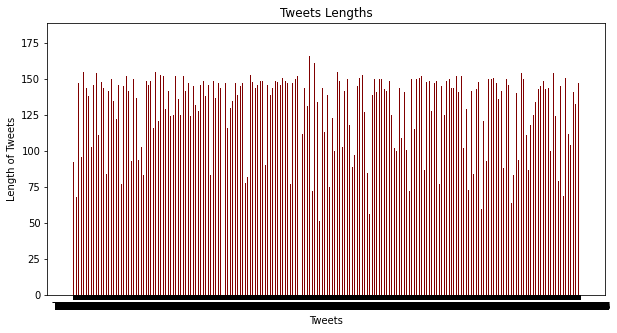

In [12]:
sizeTweets=[]
tweetNumber=[]
for i in range(len(trainData)):
  sizeTweets.append(len(trainData[i]))
  tweetNumber.append("Tweet"+str(i+1))

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(tweetNumber, sizeTweets, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Tweets") 
plt.ylabel("Length of Tweets") 
plt.title("Tweets Lengths") 
plt.show() 

In [13]:
vallebl,valData= readandSplit("/content/drive/MyDrive/Dataset/Validation/dev_3k_split_conll.txt")

trainData+=valData
label+=vallebl

In [14]:
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(trainData).toarray()

In [15]:
rfc1=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=0, warm_start=False)
rfc1.fit(X, label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
testData=readInList("/content/drive/MyDrive/Dataset/Test/Hindi_test_unalbelled_conll_updated.txt")

In [17]:
list1=[]
for i in range(len(testData)):
  testData[i]
  list1.append(testData[i])
  list1

p=rfc1.predict(vectorizer.transform(list1).toarray())

In [18]:
p=list(p)

In [19]:
#Taking out Uids
with open("/content/drive/MyDrive/Dataset/Test/Hindi_test_unalbelled_conll_updated.txt") as f:
      data = f.read().split('\n')

uids = []   
tweet = ""


for d in data:
  if(len(d)==0):
    continue
  elif(d.split()[0]=='meta'):
    uids.append(d.split()[1])
 



In [20]:
#ORIGINAL TEST LABELS

with open("/content/drive/MyDrive/Dataset/Test/test_labels_hinglish.txt") as f:
      data = f.read().split('\n')

intermediateLabels= []   
tweet = ""

i=0

for i in range(len(data)):

  for j in range(len(data[i])):
    if(data[i][j]==','  ):
      intermediateLabels.append(data[i][j+1:])

testLabels=[]

for i in range(len(intermediateLabels)-1):
  testLabels.append(intermediateLabels[i+1])





In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(testLabels, p)

0.6456666666666667

In [22]:


print(len(p))
count=0
store1 = []
for i in range(0, len(uids)):
    save = ""
    res = p[i]

    if (res == "positive"):
        save += uids[i]
        save += ",positive\n"
        count+=1

    elif (res == "neutral"):
        save +=uids[i]
        save += ",neutral\n"
        count+=1

    elif (res == "negative"):
        save += uids[i]
        save += ",negative\n"
        count+=1
    else:
        print(uids[i])

    store1.append(save)



with open('answer.txt','w',encoding='utf-8') as file:
    i=0
    while (i<len(store1)):
        file.write(store1[i])
        i+=1

3000


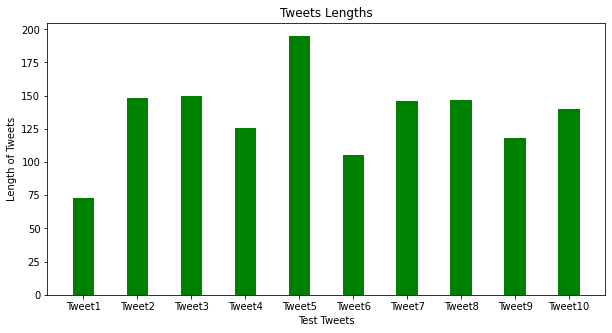

In [28]:
sizeTweets=[]
tweetNumber=[]
for i in range(len(testData[:10])):
  sizeTweets.append(len(testData[i]))
  tweetNumber.append("Tweet"+str(i+1))

fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(tweetNumber, sizeTweets, color ='green',  
        width = 0.4) 
  
plt.xlabel("Test Tweets") 
plt.ylabel("Length of Tweets") 
plt.title("Tweets Lengths") 
plt.show() 